In [1]:
%pylab inline
%load_ext autotime
import pandas as pd
from pysctransform.pysctransform import vst
from pysctransform.plotting import plot_fit
import logging
logging.captureWarnings(True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
counts_df = pd.read_csv("../data/pbmc3k.csv", index_col=0)
counts_df.head()

,AAACATACAACCAC-1,AAACATTGAGCTAC-1,AAACATTGATCAGC-1,AAACCGTGCTTCCG-1,AAACCGTGTATGCG-1,AAACGCACTGGTAC-1,AAACGCTGACCAGT-1,AAACGCTGGTTCTT-1,AAACGCTGTAGCCA-1,AAACGCTGTTTCTG-1,...,TTTCAGTGTCACGA-1,TTTCAGTGTCTATC-1,TTTCAGTGTGCAGT-1,TTTCCAGAGGTGAG-1,TTTCGAACACCTGA-1,TTTCGAACTCTCAT-1,TTTCTACTGAGGCA-1,TTTCTACTTCCTCG-1,TTTGCATGAGAGGC-1,TTTGCATGCCTCAC-1
TNFRSF4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CPSF3L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
ATAD3C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1orf86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RER1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


time: 695 ms


# Default SCTransform: Currently ~20x slower than SCTransform!

In [3]:
vst_out = vst(counts_df)

100%|██████████| 1823/1823 [03:16<00:00,  9.26it/s]


time: 3min 33s


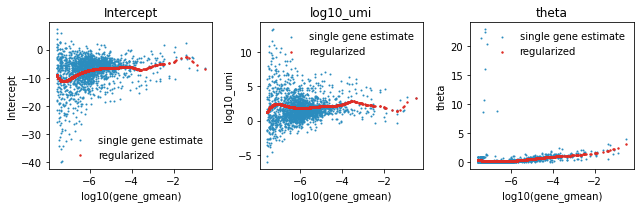

time: 619 ms


In [4]:
_ = plot_fit(vst_out)

# Enable tensorflow mode for superfast updates

In [3]:
vst_out = vst(counts_df, use_tf=True)

100%|██████████| 1823/1823 [00:01<00:00, 1504.11it/s]


time: 33.7 s


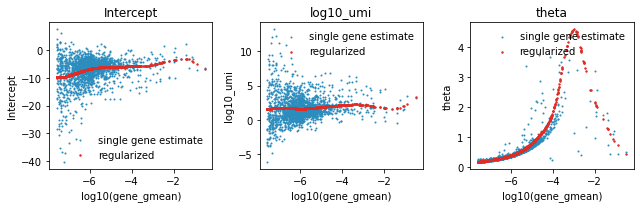

time: 915 ms


In [4]:
_ = plot_fit(vst_out)

# Compare with actual SCTransform

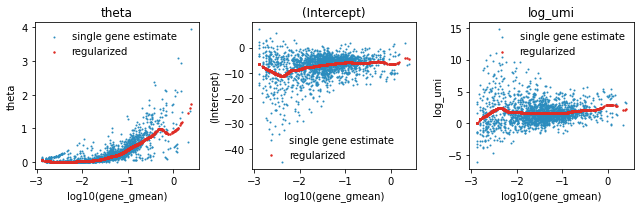

time: 678 ms


In [7]:
sct_modelparsfit = pd.read_csv(
    "../data/pbmc3k_SCT_model_pars_fit.tsv", index_col=0, sep="\t"
)
sct_modelpars = pd.read_csv(
    "../data/pbmc3k_SCT_model_pars.tsv", index_col=0, sep="\t"
)
sct_genepars = pd.read_csv(
    "../data/pbmc3k_SCT_gene_pars.tsv", index_col=0, sep="\t"
)
gene_gmean = sct_genepars.loc[sct_modelpars.index, "gmean"]
log10_gene_gmean = np.log10(gene_gmean)

vst_expected = {"model_parameters": sct_modelpars, "model_parameters_fit": sct_modelparsfit,
                "genes_log10_gmean": log10_gene_gmean}
_ = plot_fit(vst_expected)